# Import Libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Import data

In [2]:
data = pd.read_csv('dataset.csv')

In [3]:
data.head(20)

,local_ref_1,vn_marital_status,resid_province,resid_district,resid_wards,birth_incorp_date,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,...,totalSavings2021_heoSo,balanceJuin2021,nominal_interestJuin2021,real_interestJuin2021,nhomno_xhtdJuin2021,categoryJuin2021,sub_productJuin2021,loaikyhanJuin2021,sectorJuin2021,product_codeJuin2021
0,MALE,Married,27.0,262.0,9436.0,1992.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MALE,Single,79.0,769.0,27097.0,1986.0,NaN,NaN,NaN,NaN,...,NaN,0.003666,0.006953,0.004128,1.0,21061.0,365.0,DH,1890.0,22321.0
2,MALE,Married,1.0,250.0,8989.0,1980.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MALE,Single,40.0,431.0,18055.0,2001.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MALE,Married,49.0,512.0,20758.0,1989.0,0.0,0.000114,0.000636,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,MALE,Single,37.0,377.0,14719.0,1993.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,MALE,Single,1.0,6.0,178.0,1994.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,MALE,Married,38.0,394.0,15436.0,1992.0,0.0,0.000476,0.000011,0.0,...,NaN,0.000139,0.000456,0.000000,1.0,1005.0,379.0,NH,1740.0,23311.0
8,MALE,Married,40.0,412.0,16693.0,1989.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,FEMALE,Single,1.0,6.0,178.0,2000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.describe()

,resid_province,resid_district,resid_wards,birth_incorp_date,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,...,totalLoginJuin2021_heoSo,totalSavings2021_heoSo,balanceJuin2021,nominal_interestJuin2021,real_interestJuin2021,nhomno_xhtdJuin2021,categoryJuin2021,sub_productJuin2021,sectorJuin2021,product_codeJuin2021
count,93431.000000,93435.000000,93433.000000,99990.000000,54800.00000,5.480000e+04,54800.000000,56850.000000,56850.000000,56850.000000,...,7571.000000,7592.000000,29956.000000,29956.000000,29956.000000,29956.000000,29956.000000,20750.000000,29956.000000,29956.000000
mean,32.143379,339.395291,12481.062130,1988.480668,0.00059,1.223446e-03,0.000669,0.336851,0.577766,1.489921,...,29.372606,0.016666,0.003399,0.005937,0.003274,1.780111,17776.982574,407.920916,1803.790292,24257.601716
std,29.360372,278.936947,10064.755806,9.474698,0.00615,6.287416e-03,0.007529,0.526343,2.857005,0.706985,...,56.832050,0.021570,0.016369,0.027024,0.017217,1.033548,5929.056978,44.138990,77.447833,1963.354679
min,0.000000,0.000000,0.000000,1073.000000,0.00000,2.040000e-09,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.010638,0.000000,0.000000,-0.136527,1.000000,1005.000000,306.000000,1690.000000,21113.000000
25%,1.000000,21.000000,637.000000,1983.000000,0.00000,3.060000e-05,0.000011,0.000000,0.000000,1.000000,...,8.000000,0.010638,0.000000,0.000000,0.000000,1.000000,17002.000000,379.000000,1740.000000,23212.000000
50%,30.000000,298.000000,11077.000000,1990.000000,0.00000,1.551020e-04,0.000045,0.000000,0.000000,1.000000,...,16.000000,0.010638,0.000029,0.000094,0.000000,1.000000,21061.000000,386.000000,1830.000000,23231.000000
75%,51.000000,532.000000,21385.000000,1995.000000,0.00000,7.297960e-04,0.000182,1.000000,1.000000,2.000000,...,34.000000,0.010638,0.001500,0.003556,0.001684,2.000000,21064.000000,462.000000,1890.000000,26111.000000
max,96.000000,973.000000,99999.000000,2020.000000,1.00000,1.000000e+00,1.000000,5.000000,331.000000,6.000000,...,1361.000000,1.000000,1.000000,1.000000,1.000000,5.000000,21071.000000,750.000000,1918.000000,51811.000000


In [5]:
data.isnull().sum()

local_ref_1                      2734
vn_marital_status                3029
resid_province                   6569
resid_district                   6565
resid_wards                      6567
birth_incorp_date                  10
 amount_week                    45200
max_amount_week                 45200
min_amount_week                 45200
distinct_payment_code_week      43150
count_payment_code_week         43150
distinct_trans_group_week       43150
distinct_ref_no_week            43150
amount_month                    23000
max_amount_month                23000
min_amount_month                23000
distinct_payment_code_month     17777
count_payment_code_month        17777
distinct_trans_group_month      17777
distinct_ref_no_month           17777
amount_3month                   13480
max_amount_3month               13480
min_amount_3month               13480
distinct_payment_code_3month        0
count_payment_code_3month           0
distinct_trans_group_3month         0
distinct_ref

In [6]:
data.columns = data.columns.str.replace(' ','_')
data.head()

,local_ref_1,vn_marital_status,resid_province,resid_district,resid_wards,birth_incorp_date,_amount_week_,max_amount_week,min_amount_week,distinct_payment_code_week,...,totalSavings2021_heoSo,balanceJuin2021,nominal_interestJuin2021,real_interestJuin2021,nhomno_xhtdJuin2021,categoryJuin2021,sub_productJuin2021,loaikyhanJuin2021,sectorJuin2021,product_codeJuin2021
0,MALE,Married,27.0,262.0,9436.0,1992.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MALE,Single,79.0,769.0,27097.0,1986.0,NaN,NaN,NaN,NaN,...,NaN,0.003666,0.006953,0.004128,1.0,21061.0,365.0,DH,1890.0,22321.0
2,MALE,Married,1.0,250.0,8989.0,1980.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MALE,Single,40.0,431.0,18055.0,2001.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MALE,Married,49.0,512.0,20758.0,1989.0,0.0,0.000114,0.000636,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.columns.to_frame()

,0
local_ref_1,local_ref_1
vn_marital_status,vn_marital_status
resid_province,resid_province
resid_district,resid_district
resid_wards,resid_wards
birth_incorp_date,birth_incorp_date
_amount_week_,_amount_week_
max_amount_week,max_amount_week
min_amount_week,min_amount_week
distinct_payment_code_week,distinct_payment_code_week


In [8]:
data.dtypes

local_ref_1                      object
vn_marital_status                object
resid_province                  float64
resid_district                  float64
resid_wards                     float64
birth_incorp_date               float64
_amount_week_                   float64
max_amount_week                 float64
min_amount_week                 float64
distinct_payment_code_week      float64
count_payment_code_week         float64
distinct_trans_group_week       float64
distinct_ref_no_week            float64
amount_month                    float64
max_amount_month                float64
min_amount_month                float64
distinct_payment_code_month     float64
count_payment_code_month        float64
distinct_trans_group_month      float64
distinct_ref_no_month           float64
amount_3month                   float64
max_amount_3month               float64
min_amount_3month               float64
distinct_payment_code_3month      int64
count_payment_code_3month         int64


In [9]:
data.shape

(100000, 50)

In [10]:
import missingno

<AxesSubplot:>

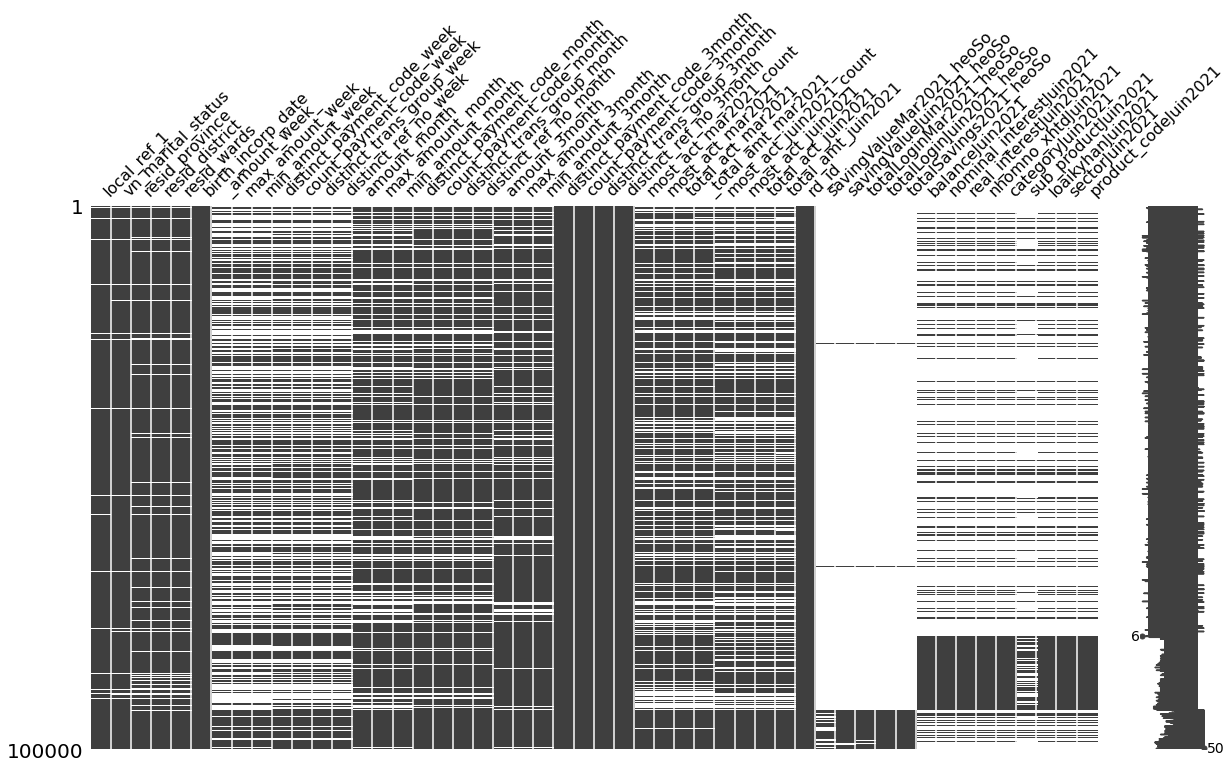

In [11]:
missingno.matrix(data, figsize = [20,10])

29


<AxesSubplot:>

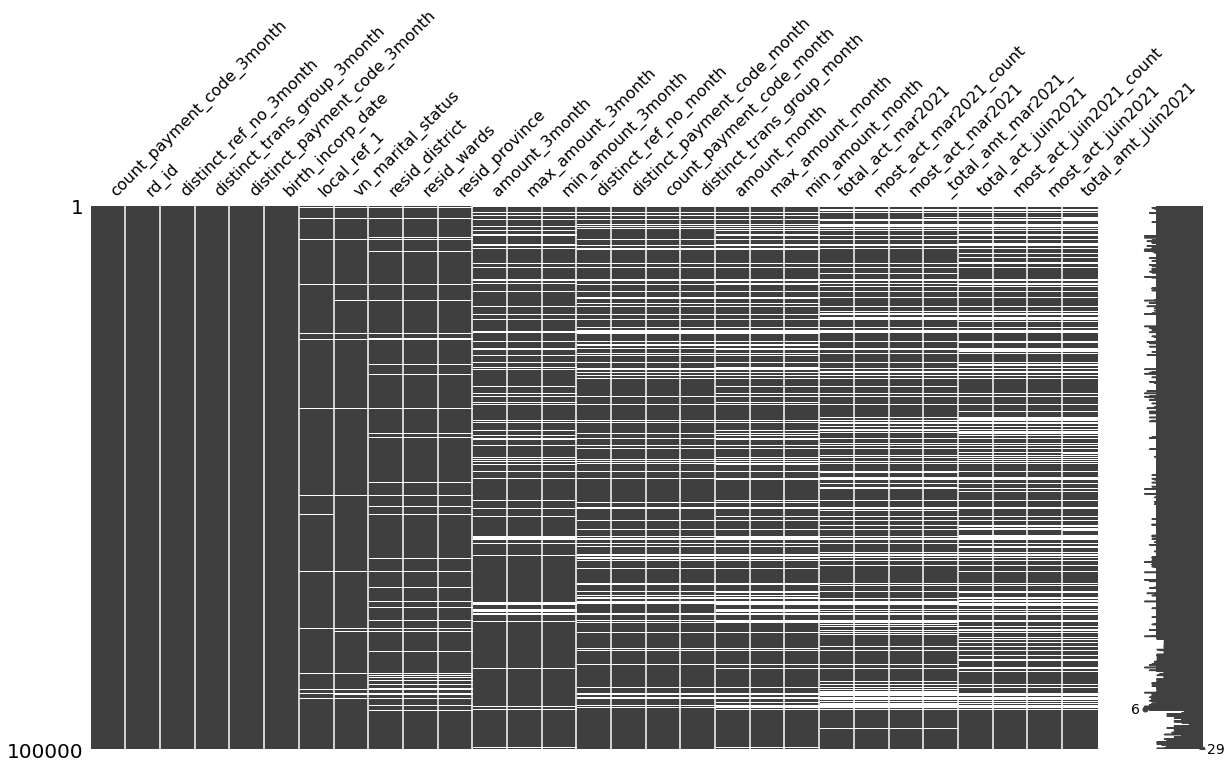

In [12]:
# Drop variables in which the rate of the missing values is 65%
values = data.isna().sum().sort_values()
indexs = data.isna().sum().sort_values().index
new_data = pd.DataFrame()
data_len = len(data)
for idx in indexs:
    if values[idx]/len(data) <= 0.35:
        new_data[idx] = data[idx]
print(len(new_data.columns))
missingno.matrix(new_data, figsize = [20,10])

In [13]:
len(data)

100000

## Looking for Y

In [14]:
filter_y = data[(data['total_act_juin2021'] <= 4) & (data['total_amt_juin2021'] <= data['total_amt_juin2021'].mean())]
filter_y.shape

(17748, 50)

## Fill in missing data for other variables

### Object variables

In [15]:
object_cols = [col for col in new_data.columns if new_data[col].dtype == 'object']
print(object_cols)

['local_ref_1', 'vn_marital_status', 'most_act_mar2021', 'most_act_juin2021']


In [16]:
# Replace null values for 2 variables: local_ref_1, vn_marital_status
for col_ob in object_cols[0:2]:
    diffs = new_data[col_ob].unique()
    print(f"Unique values are: {diffs}")
    print(f"Number of Nan is : {new_data[col_ob].isnull().sum()}\n")
    # Replace null values using mode
    max_val = new_data[col_ob].mode().values
    new_data[col_ob].fillna(max_val[0], inplace=True)

Unique values are: ['MALE' 'FEMALE' nan]
Number of Nan is : 2734

Unique values are: ['Married' 'Single' nan 'Other' 'Partner' 'Seperated' 'Divorced' 'Widow']
Number of Nan is : 3029



In [17]:
# Replace null values for 2 variables: most_act_mar2021, most_act_juin2021
for col_ob in object_cols[2:4]:
    diffs = new_data[col_ob].unique()
    print(f"Unique values are: {diffs}")
    print(f"Number of Nan is : {new_data[col_ob].isnull().sum()}\n")
    # Replace null values using mode
    max_val = new_data[col_ob].mode().values
    new_data[col_ob].fillna('Khong co giao dich', inplace=True)

Unique values are: ['Giao dich chuyen khoan' nan 'GIAO DICH PHI TAI CHINH'
 'Giao dich thanh toan' 'GIAO DICH RUT TIEN ATM' 'GIAO DICH TIET KIEM'
 'GIAO DICH THANH TOAN']
Number of Nan is : 26524

Unique values are: ['Giao dich chuyen khoan' 'Giao dich thanh toan' nan
 'GIAO DICH RUT TIEN ATM' 'GIAO DICH TIET KIEM' 'GIAO DICH PHI TAI CHINH'
 'GIAO DICH THANH TOAN' 'GIAO DICH VAY']
Number of Nan is : 28625



Null values is supposed to be "No transaction"

In [18]:
# Check whether the variables above have null values or not
new_data['local_ref_1'].isnull().sum()

0

In [19]:
new_data['vn_marital_status'].isnull().sum()

0

In [20]:
new_data['most_act_mar2021'].isnull().sum()

0

In [21]:
new_data['most_act_juin2021'].isnull().sum()

0

#### Converting categorical features

In [22]:
Gender = pd.get_dummies(new_data['local_ref_1'], drop_first=True)
Married_status = pd.get_dummies(new_data['vn_marital_status'], drop_first=True)
Most_act_3 = pd.get_dummies(new_data['most_act_mar2021'], prefix='Most_act_3', prefix_sep='_', drop_first=True)
Most_act_6 = pd.get_dummies(new_data['most_act_juin2021'], prefix='Most_act_6', prefix_sep='_',  drop_first=True)
new_data = pd.concat([new_data, Gender, Married_status, Most_act_3, Most_act_6], axis = 1)

In [23]:
new_data.head(20)

,count_payment_code_3month,rd_id,distinct_ref_no_3month,distinct_trans_group_3month,distinct_payment_code_3month,birth_incorp_date,local_ref_1,vn_marital_status,resid_district,resid_wards,...,Most_act_3_Giao dich chuyen khoan,Most_act_3_Giao dich thanh toan,Most_act_3_Khong co giao dich,Most_act_6_GIAO DICH RUT TIEN ATM,Most_act_6_GIAO DICH THANH TOAN,Most_act_6_GIAO DICH TIET KIEM,Most_act_6_GIAO DICH VAY,Most_act_6_Giao dich chuyen khoan,Most_act_6_Giao dich thanh toan,Most_act_6_Khong co giao dich
0,0,1542621943,33,2,0,1992.0,MALE,Married,262.0,9436.0,...,1,0,0,0,0,0,0,1,0,0
1,0,1570544787,5,2,0,1986.0,MALE,Single,769.0,27097.0,...,0,0,1,0,0,0,0,0,1,0
2,3,636921018,7,2,2,1980.0,MALE,Married,250.0,8989.0,...,1,0,0,0,0,0,0,1,0,0
3,0,642516181,1,1,0,2001.0,MALE,Single,431.0,18055.0,...,0,0,1,0,0,0,0,0,0,1
4,11,1308443119,24,3,1,1989.0,MALE,Married,512.0,20758.0,...,1,0,0,0,0,0,0,1,0,0
5,5,435820450,5,1,1,1993.0,MALE,Single,377.0,14719.0,...,0,0,0,0,0,0,0,0,0,1
6,0,1499819800,2,1,0,1994.0,MALE,Single,6.0,178.0,...,0,0,1,0,0,0,0,0,0,1
7,2,1689551331,141,3,1,1992.0,MALE,Married,394.0,15436.0,...,1,0,0,0,0,0,0,1,0,0
8,3,1676525990,4,2,1,1989.0,MALE,Married,412.0,16693.0,...,0,0,1,0,0,0,0,0,0,1
9,0,1877913769,1,1,0,2000.0,FEMALE,Single,6.0,178.0,...,0,0,1,0,0,0,0,0,0,1


<AxesSubplot:>

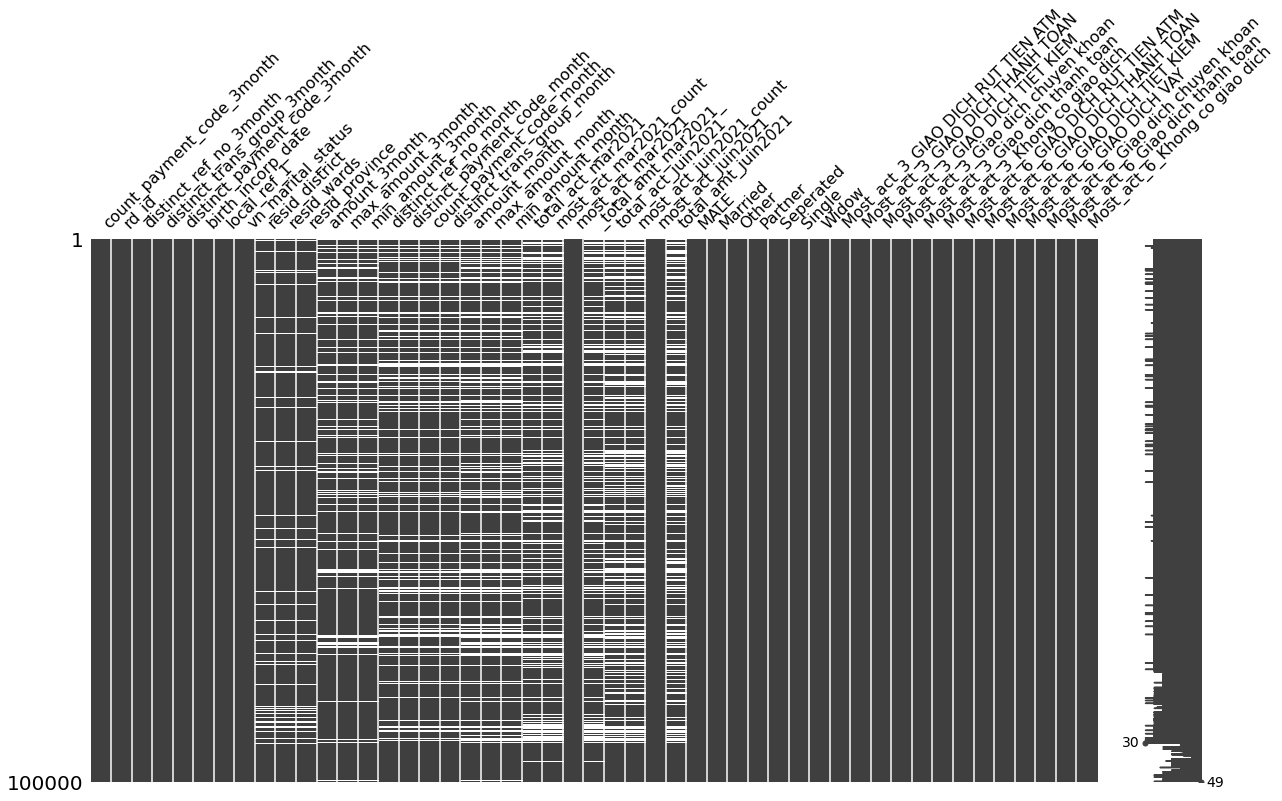

In [24]:
missingno.matrix(new_data, figsize = [20,10])

### Other variables

#### Age

In [25]:
data['birth_incorp_date'].describe()

count    99990.000000
mean      1988.480668
std          9.474698
min       1073.000000
25%       1983.000000
50%       1990.000000
75%       1995.000000
max       2020.000000
Name: birth_incorp_date, dtype: float64

In [26]:
# replace birth_incorp_date with:
new_data['Age']= 2021 - new_data['birth_incorp_date']

In [27]:
new_data.drop(columns=['birth_incorp_date'], inplace=True) 

In [28]:
new_data['Age'].isnull().sum()

10

In [29]:
new_data['Age'].fillna(new_data['Age'].mean(), inplace=True)

There are some outliers in Age
This is a nature outlier due to the human error. The person can mistakenly write 0 instead of 9 in the second place of the number '1073' -> '1973'

<AxesSubplot:xlabel='Age'>

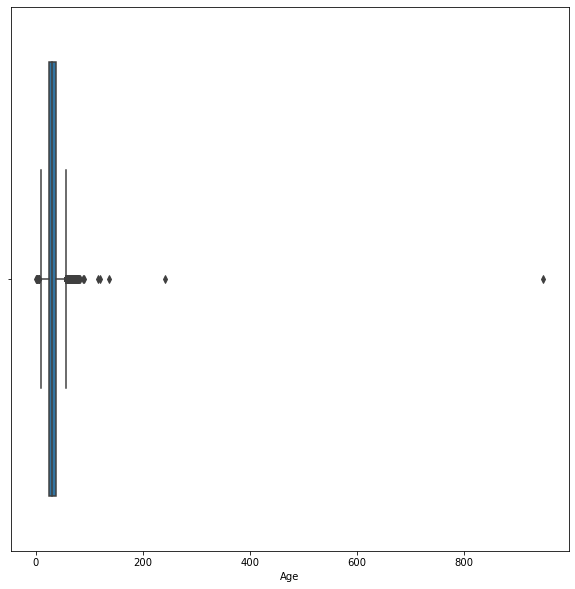

In [30]:
plt.figure(figsize=(10,10))
sns.boxplot(data=new_data,x=new_data['Age'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

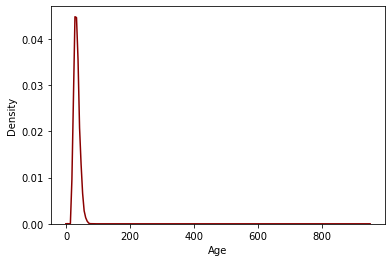

In [31]:
sns.distplot(new_data['Age'].dropna(),hist=False,color='darkred',bins=30)

In [32]:
median = float(new_data['Age'].median())
new_data['Age'] = np.where(new_data['Age'] > 90, median, new_data['Age'])
new_data['Age'] = np.where(new_data['Age'] < 18, median, new_data['Age'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

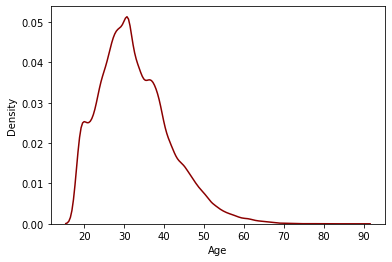

In [33]:
sns.distplot(new_data['Age'],hist=False,color='darkred',bins=30)

<AxesSubplot:xlabel='Age'>

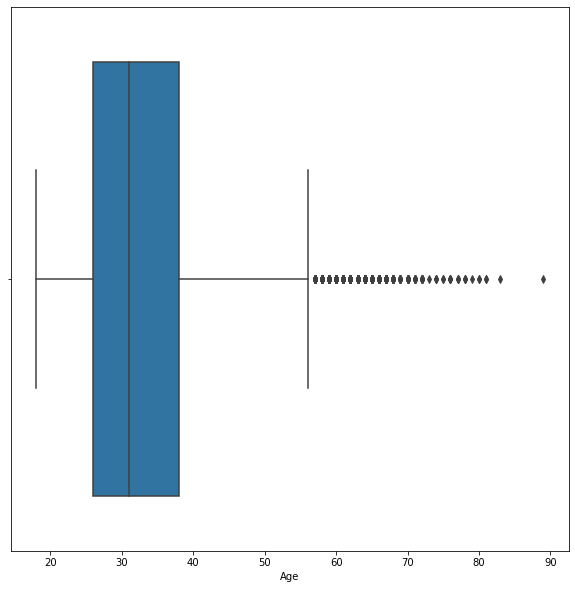

In [34]:
plt.figure(figsize=(10,10))
sns.boxplot(data=new_data,x=new_data['Age'])

<AxesSubplot:>

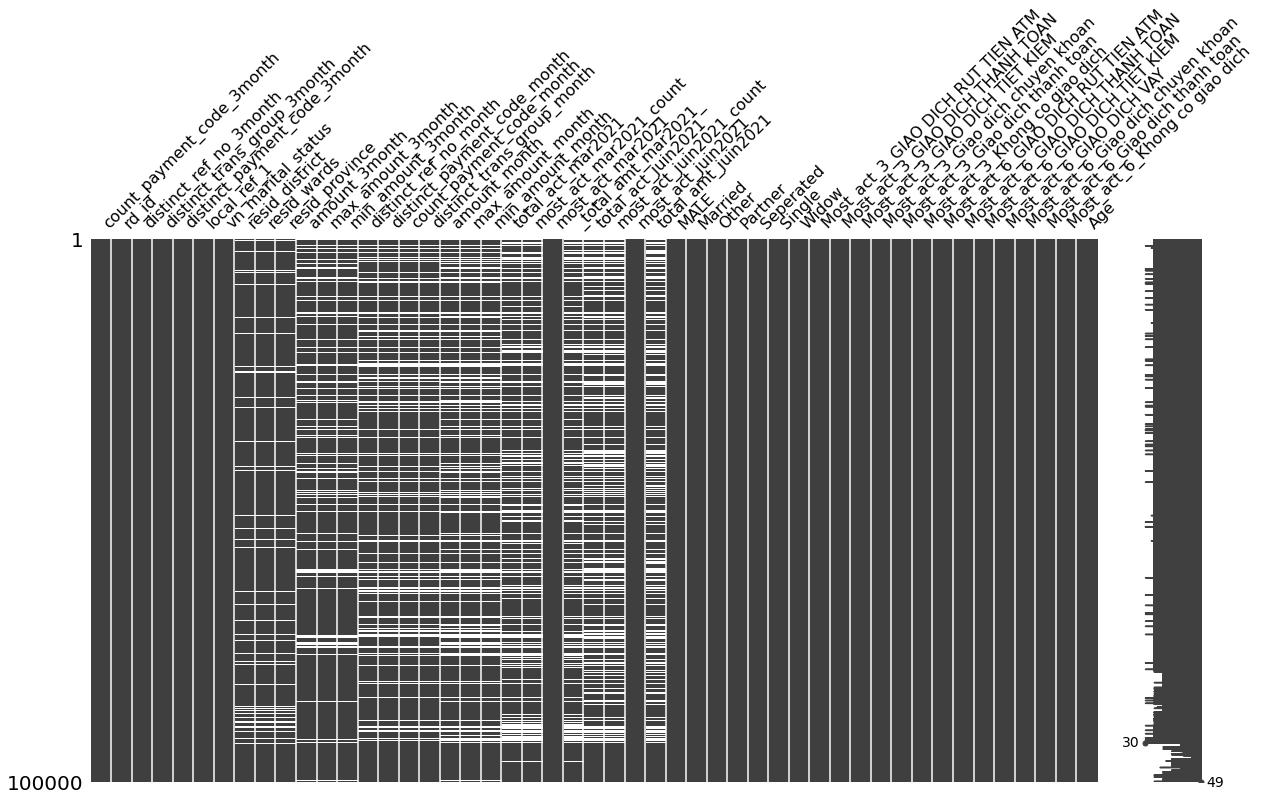

In [35]:
missingno.matrix(new_data, figsize = [20,10])

#### Address

In [36]:
for address in ['resid_province', 'resid_district','resid_wards']:
    most_add = new_data[address].mode().values[0]
    new_data[address].fillna(most_add, inplace=True)
new_data.drop(columns=['resid_district', 'resid_wards'], inplace=True) 

<AxesSubplot:>

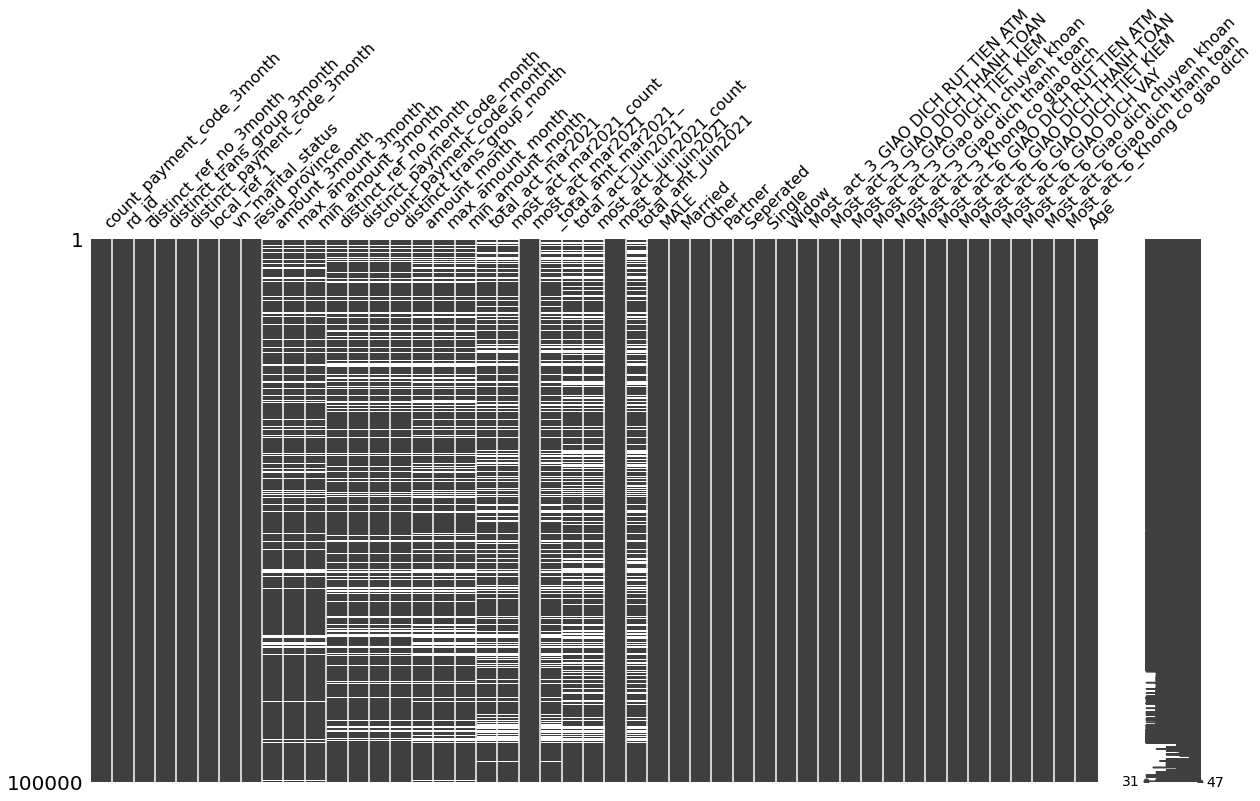

In [37]:
missingno.matrix(new_data, figsize = [20,10])

#### 3 months

In [38]:
p_3m = ['amount_3month', 'max_amount_3month', 'min_amount_3month']
for pm in p_3m:
    new_data[pm].fillna(new_data[pm].mode().values[0], inplace=True)

<AxesSubplot:>

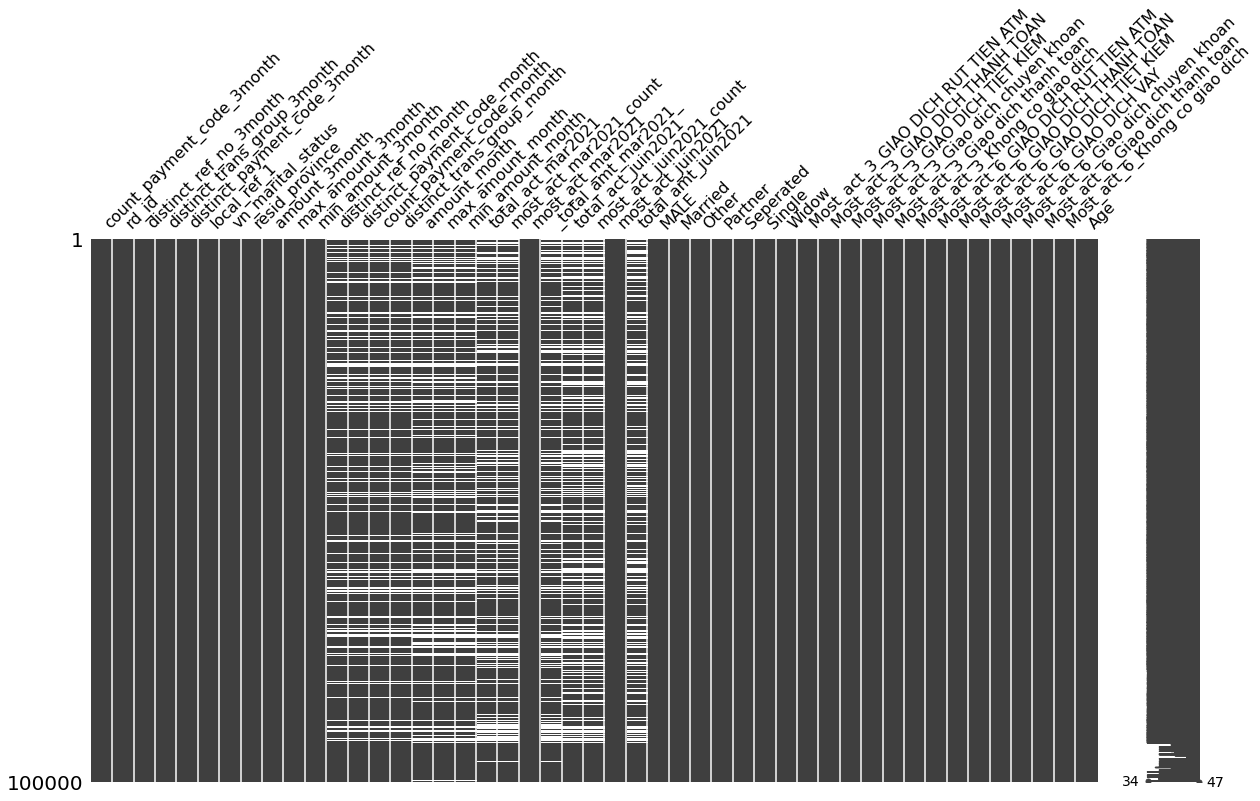

In [39]:
missingno.matrix(new_data, figsize = [20,10])

#### month

In [40]:
d_m =  ['distinct_ref_no_month', 'distinct_payment_code_month', 'count_payment_code_month', 'distinct_trans_group_month']
for m in d_m:
    new_data[m].fillna(new_data[m].mode().values[0], inplace=True)
new_data.drop(columns=d_m, inplace=True)

<AxesSubplot:>

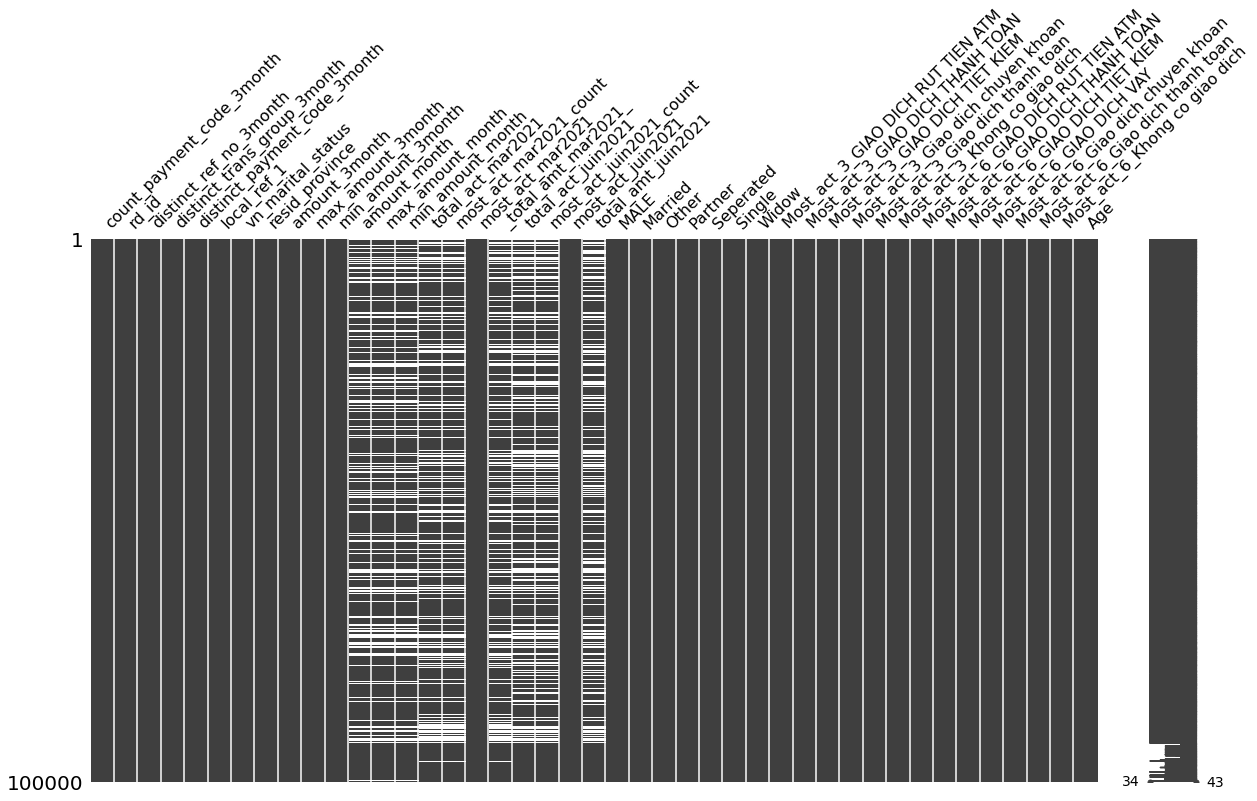

In [41]:
missingno.matrix(new_data, figsize = [20,10])

In [42]:
p_m = ['amount_month', 'max_amount_month', 'min_amount_month']
for m in p_m:
    new_data[m].fillna(0, inplace=True)
new_data.drop(columns=p_m, inplace=True)

<AxesSubplot:>

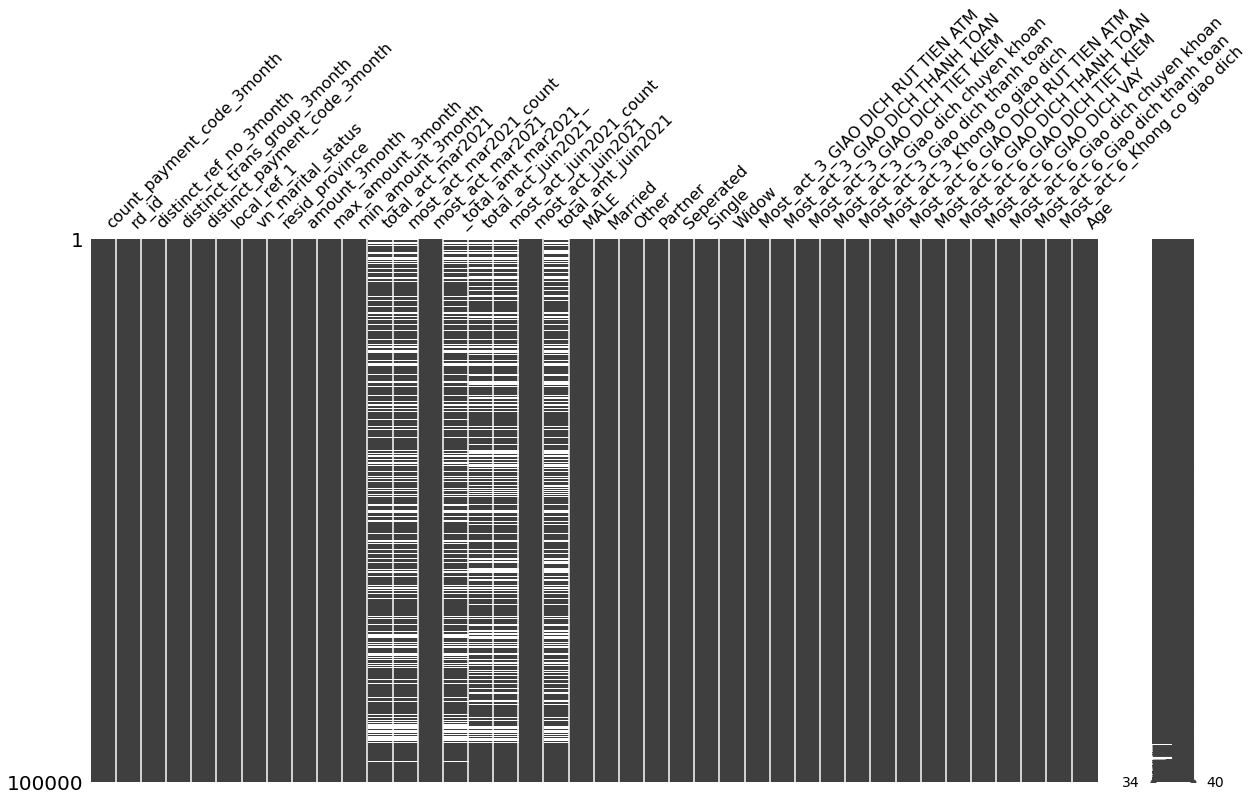

In [43]:
missingno.matrix(new_data, figsize = [20,10])

#### Mar2021

In [44]:
act_mar = ['total_act_mar2021', 'most_act_mar2021_count']
for am in act_mar:
    new_data[am].fillna(0, inplace=True)

<AxesSubplot:>

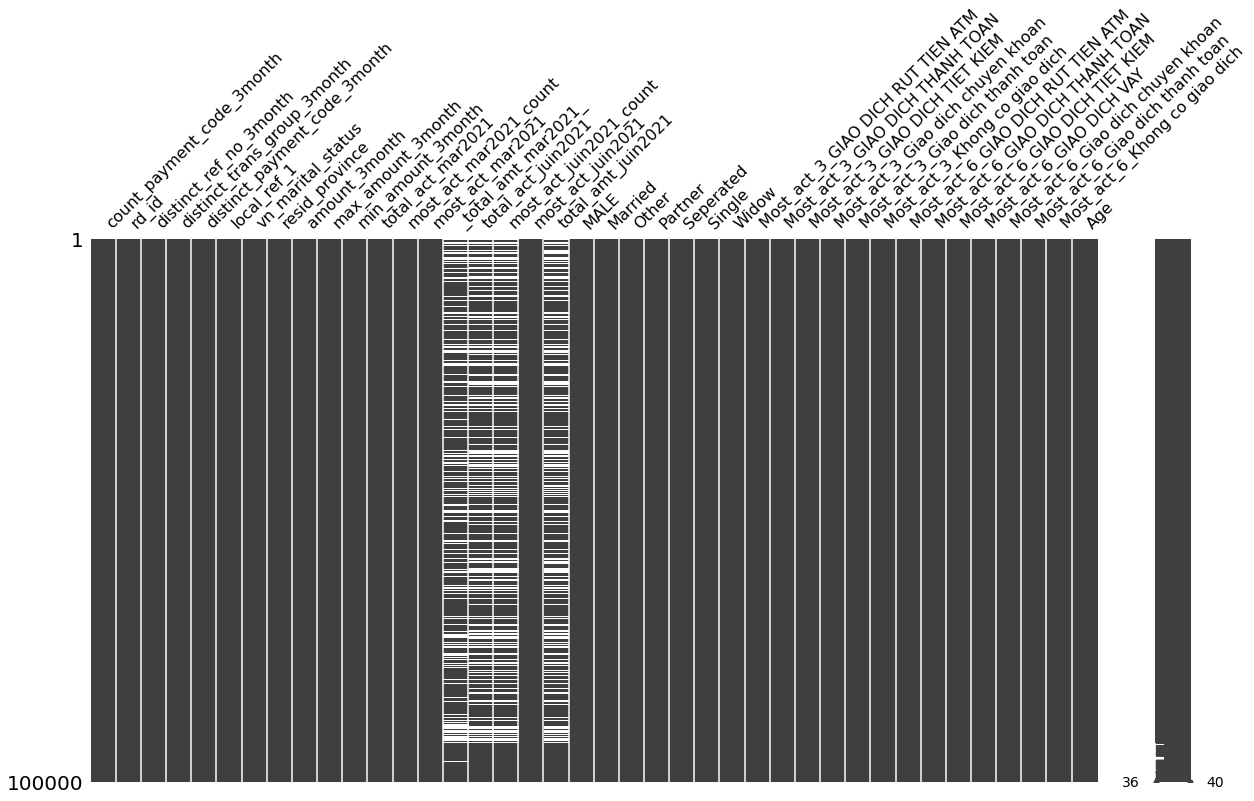

In [45]:
missingno.matrix(new_data, figsize = [20,10])

In [46]:
new_data['_total_amt_mar2021_'].fillna(0, inplace=True)

#### June2021

In [47]:
new_data['most_act_juin2021_count'].fillna(0, inplace=True)

<AxesSubplot:>

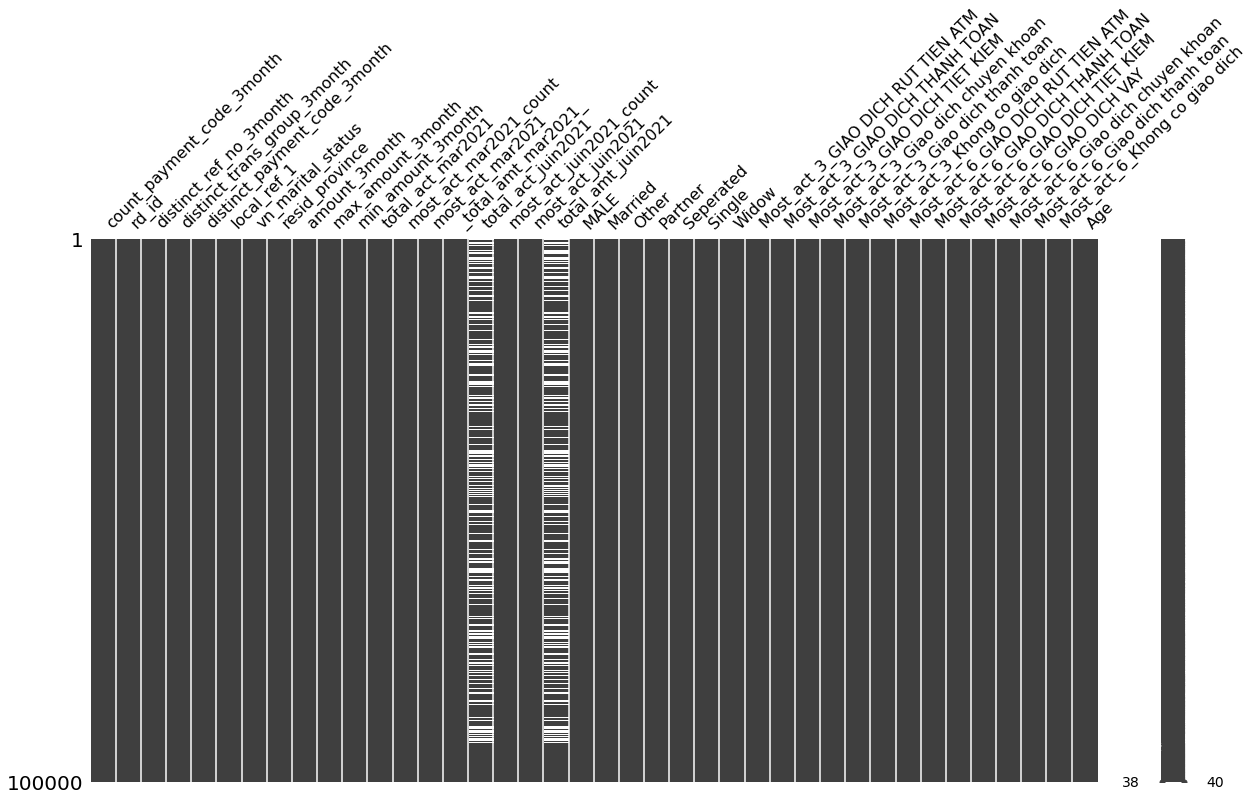

In [48]:
missingno.matrix(new_data, figsize = [20,10])

# Labelling Y 

In [49]:
### Fill in mising value for “total_amt_juin2021” 

In [50]:
bins= [18.0,20.0,30.0, 40.0, 50.0, 60.0, 90.0]
labels = ['Under 20','20 to 29','30 to 39','40 to 49','50 to 59', '60 and older']
new_data['AgeGroup'] = pd.cut(new_data['Age'], bins=bins, labels=labels, right=False)

In [51]:
new_data[['Age','AgeGroup']].head()

,Age,AgeGroup
0,29.0,20 to 29
1,35.0,30 to 39
2,41.0,40 to 49
3,20.0,20 to 29
4,32.0,30 to 39


In [52]:
Age_Amount_mean = new_data.groupby('AgeGroup')['total_amt_juin2021'].mean()
Age_Amount_mean

AgeGroup
Under 20        0.000317
20 to 29        0.002122
30 to 39        0.004370
40 to 49        0.004383
50 to 59        0.005104
60 and older    0.006820
Name: total_amt_juin2021, dtype: float64

We can see that the older people get, the higher amount they put in their bank account

In [53]:
import math
for i in range(len(new_data)):
    if math.isnan(new_data['total_act_juin2021'][i]):
            new_data['total_amt_juin2021'][i] = 0
    else:
            if math.isnan(new_data['total_amt_juin2021'][i]):
            
                if new_data['AgeGroup'][i] == 'Under 20':
                    new_data['total_amt_juin2021'][i] = 0.000317

                elif new_data['AgeGroup'][i] == '20 to 29':
                    new_data['total_amt_juin2021'][i] = 0.002122

                elif new_data['AgeGroup'][i] == '30 to 39':
                    new_data['total_amt_juin2021'][i] = 0.004370

                elif new_data['AgeGroup'][i] == '40 to 49':
                    new_data['total_amt_juin2021'][i] = 0.004383

                elif new_data['AgeGroup'][i] == '50 to 59':
                    new_data['total_amt_juin2021'][i] = 0.005104

                else:
                    new_data['total_amt_juin2021'][i] = 0.006820
            else:
                new_data['total_amt_juin2021'][i]

C:\Users\HP\AppData\Local\Temp/ipykernel_10088/2498867037.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['total_amt_juin2021'][i] = 0
C:\Users\HP\AppData\Local\Temp/ipykernel_10088/2498867037.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['total_amt_juin2021'][i] = 0.004370
C:\Users\HP\AppData\Local\Temp/ipykernel_10088/2498867037.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['total_amt_juin

In [54]:
print(new_data['total_amt_juin2021'].isnull().sum())

0


In [55]:
new_data['total_amt_juin2021'].head()

0    0.006543
1    0.000062
2    0.000071
3    0.000000
4    0.000575
Name: total_amt_juin2021, dtype: float64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_amt_juin2021', ylabel='Density'>

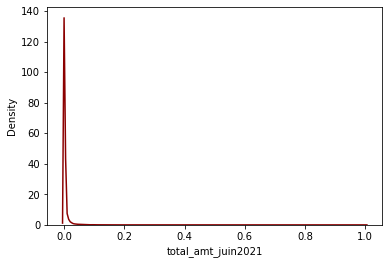

In [56]:
sns.distplot(data['total_amt_juin2021'], hist = False, color ='darkred', bins = 5)

In [57]:
new_data['total_amt_juin2021'].isnull().sum()

0

In [58]:
### Fill in mising value for “total_act_juin2021”.

In [59]:
Age_Amount_mode = new_data.groupby('AgeGroup')['total_act_juin2021'].median()
Age_Amount_mode

AgeGroup
Under 20         7.0
20 to 29        11.0
30 to 39        11.0
40 to 49         8.0
50 to 59         6.0
60 and older     4.0
Name: total_act_juin2021, dtype: float64

Opposite to the amount, the older people get, the less transaction they will make, except for the group under 20, may be they have less salary so that they have less transaction.

In [60]:
def impute_act_juin2021(cols):
    total_act_juin2021 = cols[0]
    AgeGroup = cols[1]
    
    if pd.isnull(total_act_juin2021):

        if AgeGroup == 'Under 20':
            return 7

        elif AgeGroup == '20 to 29':
            return 11
        
        elif AgeGroup == '30 to 39':
            return 11
        
        elif AgeGroup == '40 to 49':
            return 8
        
        elif AgeGroup == '50 to 59':
            return 6
        
        else:
            return 4
    
    else:
        return total_act_juin2021

In [61]:
# Apply the above funtion:
new_data['total_act_juin2021'] = new_data[['total_act_juin2021','AgeGroup']].apply(impute_act_juin2021,axis=1)

In [62]:
new_data['total_act_juin2021'].head()

0    17.0
1     1.0
2     2.0
3    11.0
4    19.0
Name: total_act_juin2021, dtype: float64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_act_juin2021', ylabel='Density'>

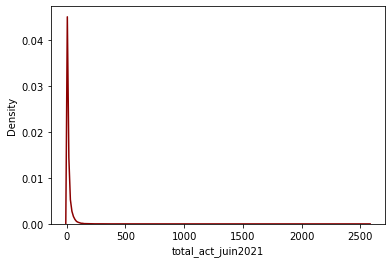

In [63]:
sns.distplot(new_data['total_act_juin2021'], hist = False, color ='darkred', bins = 5)

In [64]:
new_data['total_act_juin2021'].isnull().sum()

0

<AxesSubplot:>

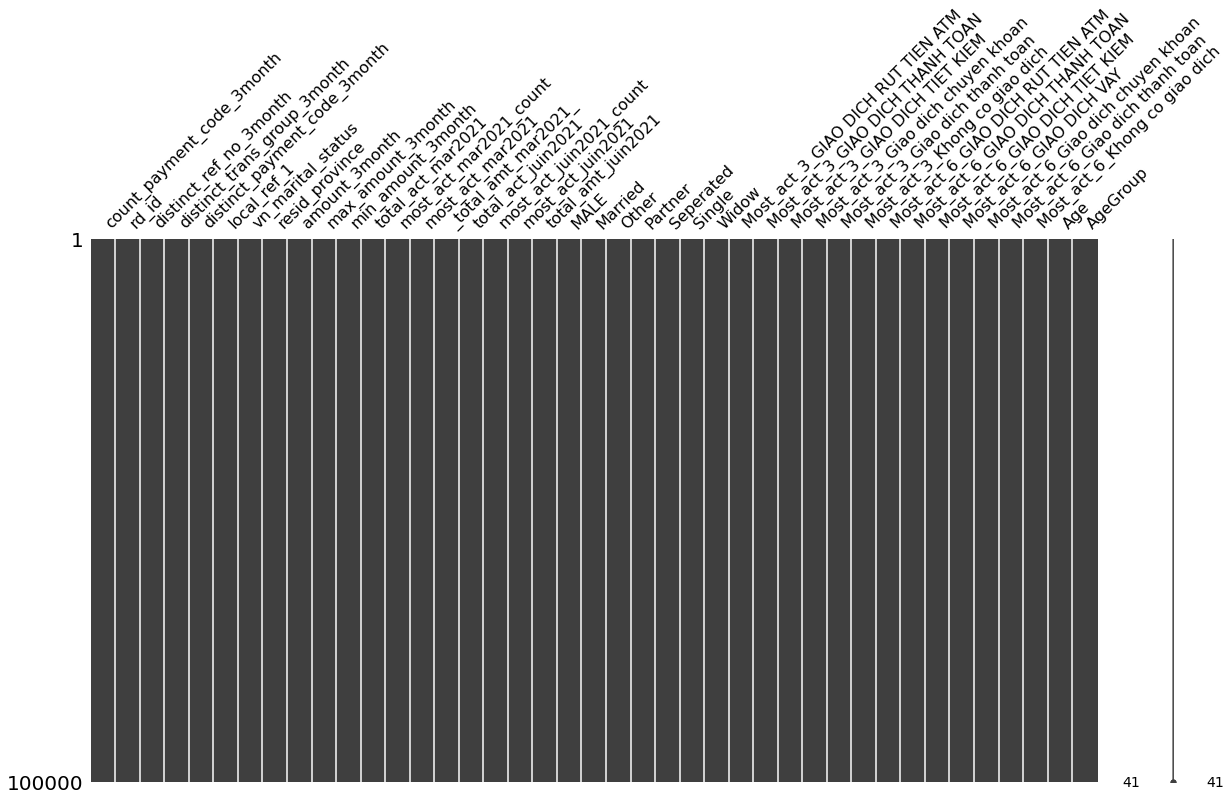

In [65]:
missingno.matrix(new_data, figsize = [20,10])

### Labelling Y

In [66]:
new_data['Churn'] = (new_data['total_act_juin2021'] <= 4) & (new_data['total_amt_juin2021'] <= new_data['total_amt_juin2021'].mean())
new_data['Churn'] = new_data['Churn'].map({True:1, False:0})

A person is considered as a churn customer when the number of the transactions he/she does in June in 2021 is fewer than 4 and his/her total transaction amount in June in 2021 is less than 0.003563 

# EDA

In [67]:
new_data.dtypes

count_payment_code_3month               int64
rd_id                                   int64
distinct_ref_no_3month                  int64
distinct_trans_group_3month             int64
distinct_payment_code_3month            int64
local_ref_1                            object
vn_marital_status                      object
resid_province                        float64
amount_3month                         float64
max_amount_3month                     float64
min_amount_3month                     float64
total_act_mar2021                     float64
most_act_mar2021_count                float64
most_act_mar2021                       object
_total_amt_mar2021_                   float64
total_act_juin2021                    float64
most_act_juin2021_count               float64
most_act_juin2021                      object
total_amt_juin2021                    float64
MALE                                    uint8
Married                                 uint8
Other                             

Drop the irrelevant variables from the model

In [68]:
new_data.drop(columns=['rd_id'], inplace=True)

Because Age is chosen in the model, we decide to drop AgeGroup

In [69]:
new_data.drop(columns=['AgeGroup'], inplace=True)

Do dữ liệu của tháng 6 năm 2021 được chọn làm target nên nhóm quyết định loại tất cả các biến có dữ liệu được thu thập trong tháng 6 năm 2021 

In [70]:
new_data.drop(columns=['Most_act_6_GIAO DICH RUT TIEN ATM', 'Most_act_6_GIAO DICH THANH TOAN', 'Most_act_6_GIAO DICH TIET KIEM', 'Most_act_6_GIAO DICH VAY', 'Most_act_6_Giao dich chuyen khoan', 'Most_act_6_Giao dich thanh toan', 'Most_act_6_Khong co giao dich'], inplace=True)

In [71]:
new_data.drop(columns=['most_act_juin2021', 'most_act_juin2021_count'], inplace=True)

<AxesSubplot:xlabel='Churn', ylabel='count'>

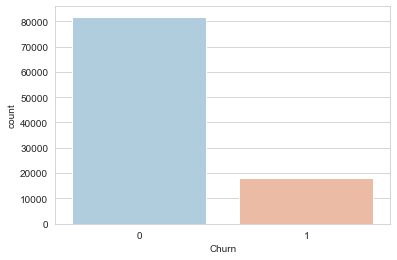

In [72]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',data=new_data,palette='RdBu_r')

<AxesSubplot:xlabel='Churn', ylabel='count'>

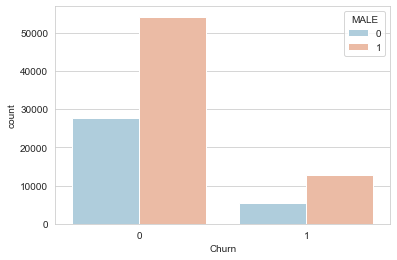

In [73]:
# Churn rate for gender
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='MALE',data=new_data,palette='RdBu_r')

In [74]:
new_data['MALE'].value_counts()

1    66914
0    33086
Name: MALE, dtype: int64

Because Male is around double the number of Female customer, the number of Male customer churn and do not churn are both higher.

In [75]:
new_data.drop(columns=['local_ref_1'], inplace=True)

Text(0.5, 1.0, 'Churn Rate and Married Status')

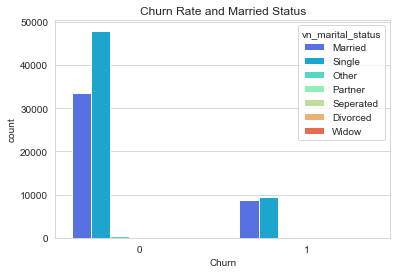

In [76]:
# Churn rate for Married Status
sns.set_style('whitegrid')
sns.countplot(x='Churn', hue = 'vn_marital_status',data=new_data,palette='rainbow')
plt.title('Churn Rate and Married Status')

Married customer are more likely to churn than the Single one. Maybe married people are more serious and care more about their personal finance than the Single one.

<AxesSubplot:xlabel='vn_marital_status', ylabel='total_amt_juin2021'>

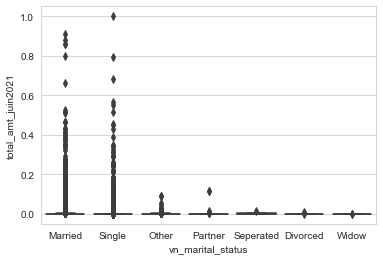

In [77]:
sns.boxplot(x='vn_marital_status', y='total_amt_juin2021', data=new_data)

<AxesSubplot:xlabel='vn_marital_status', ylabel='total_act_juin2021'>

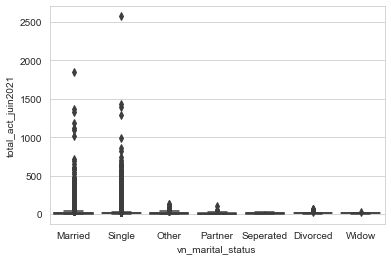

In [78]:
sns.boxplot(x='vn_marital_status', y='total_act_juin2021', data=new_data)

Có thể thấy các Married và Single chiếm phần lớn và overlap các mục khác. Do vậy mô hình chỉ xét đên 2 tình trạng hôn nhân là Married và Single

In [79]:
new_data.drop(columns=['Other', 'Widow', 'Seperated', 'Partner'], inplace=True)

In [80]:
new_data.drop(columns=['vn_marital_status'], inplace=True)

In [81]:
new_data[['Single','Married']].corr()

,Single,Married
Single,1.000000,-0.990908
Married,-0.990908,1.000000


Since Single and Married are highly correlated, we should only keep Married in the model

In [82]:
new_data.drop(columns=['Single'], inplace=True)

Text(0.5, 1.0, 'Churn Rate and Most activities in March 2021')

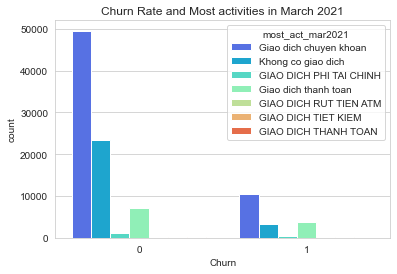

In [83]:
# Churn rate for most_act_mar2021
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='most_act_mar2021',data=new_data,palette='rainbow')
plt.title('Churn Rate and Most activities in March 2021')

There is no inside about Churn rate in this graph but most of MB's customer use 'giao dich chuyen khoan'

<AxesSubplot:xlabel='most_act_mar2021', ylabel='total_amt_juin2021'>

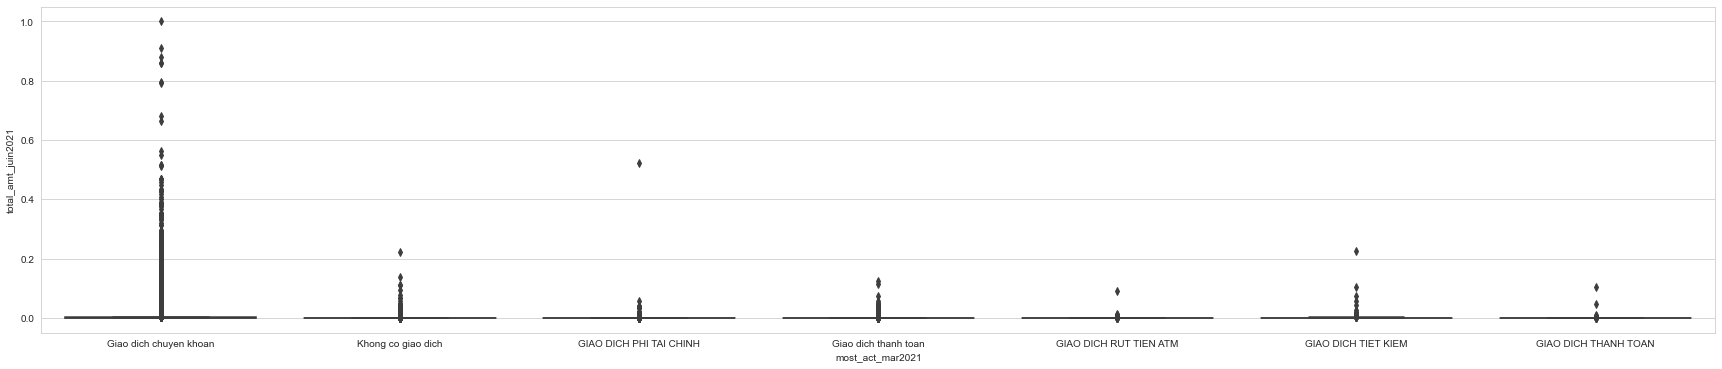

In [84]:
plt.figure(figsize=(30,6))
sns.boxplot(x='most_act_mar2021', y='total_amt_juin2021', data=new_data)

<AxesSubplot:xlabel='most_act_mar2021', ylabel='total_act_juin2021'>

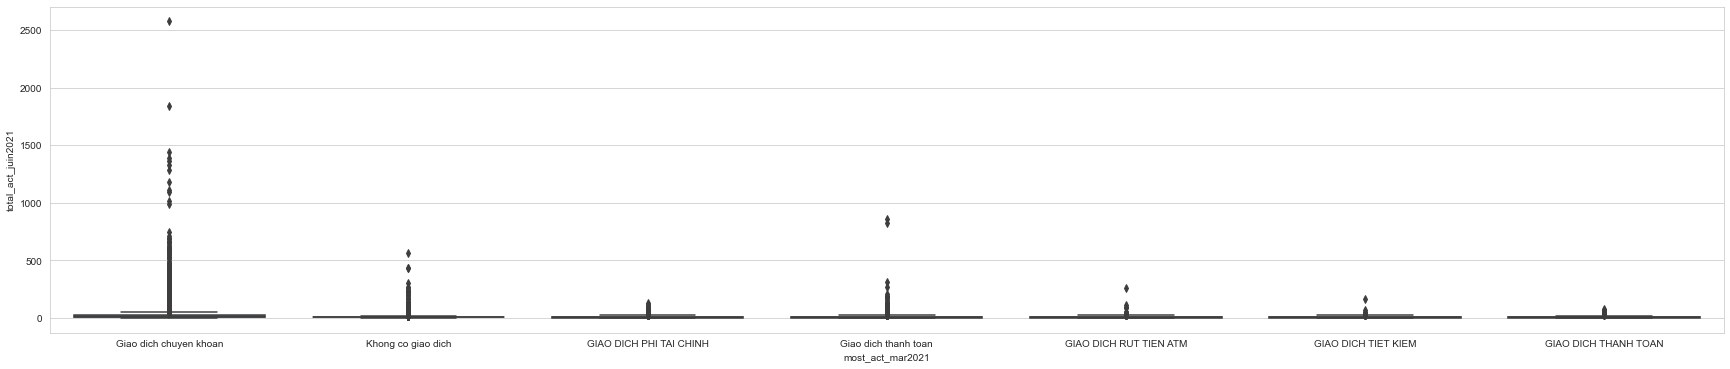

In [85]:
plt.figure(figsize=(30,6))
sns.boxplot(x='most_act_mar2021', y='total_act_juin2021', data=new_data)

Có thể thấy Giao dich chuyen khoan chiếm phần lớn và overlap các mục khác. Do vậy mô hình chỉ xét đên Loại giao dịch khách hàng thực hiện nhiều nhất trong tháng 3 năm 2021 là Giao dich chuyen khoan

In [86]:
new_data.drop(columns=['Most_act_3_Khong co giao dich', 'Most_act_3_GIAO DICH THANH TOAN', 'Most_act_3_GIAO DICH RUT TIEN ATM', 'Most_act_3_GIAO DICH TIET KIEM', 'Most_act_3_Giao dich thanh toan'], inplace=True)

In [87]:
new_data.drop(columns=['most_act_mar2021'], inplace=True)

<AxesSubplot:xlabel='amount_3month', ylabel='max_amount_3month'>

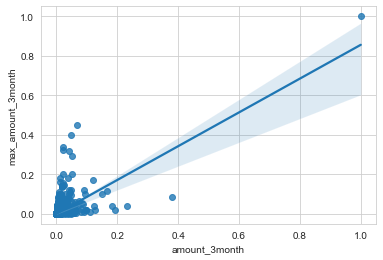

In [88]:
sns.regplot(x= 'amount_3month', y= 'max_amount_3month', data = new_data)

<AxesSubplot:xlabel='amount_3month', ylabel='min_amount_3month'>

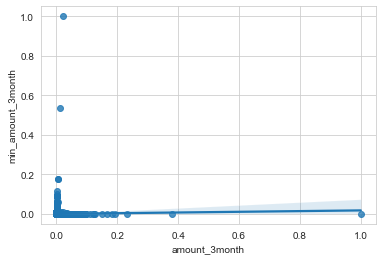

In [89]:
sns.regplot(x= 'amount_3month', y= 'min_amount_3month', data = new_data)

In [90]:
new_data[['amount_3month','max_amount_3month', 'min_amount_3month']].corr()

,amount_3month,max_amount_3month,min_amount_3month
amount_3month,1.000000,0.667015,0.018856
max_amount_3month,0.667015,1.000000,0.247081
min_amount_3month,0.018856,0.247081,1.000000


Since amount_3month, max_amount_3month and min_amount_3month are highly correlated, we should only keep amount_3month in the model

In [91]:
new_data.drop(columns=['max_amount_3month', 'min_amount_3month'], inplace=True)

<AxesSubplot:xlabel='most_act_mar2021_count', ylabel='total_act_mar2021'>

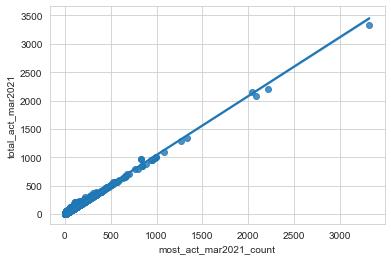

In [92]:
sns.regplot(x= 'most_act_mar2021_count', y= 'total_act_mar2021', data = new_data)

In [93]:
new_data[['most_act_mar2021_count','total_act_mar2021']].corr()

,most_act_mar2021_count,total_act_mar2021
most_act_mar2021_count,1.000000,0.994436
total_act_mar2021,0.994436,1.000000


Since most_act_mar2021_count and total_act_mar2021 are highly correlated, we should only keep total_act_mar2021 in the model

In [94]:
new_data.drop(columns=['most_act_mar2021_count'], inplace=True)

<AxesSubplot:xlabel='distinct_ref_no_3month', ylabel='total_act_mar2021'>

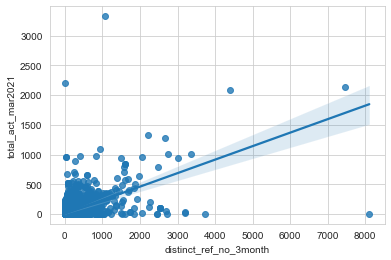

In [95]:
sns.regplot(x= 'distinct_ref_no_3month', y= 'total_act_mar2021', data = new_data)

In [96]:
new_data[['distinct_ref_no_3month','total_act_mar2021']].corr()

,distinct_ref_no_3month,total_act_mar2021
distinct_ref_no_3month,1.000000,0.615822
total_act_mar2021,0.615822,1.000000


Since distinct_ref_no_3month and total_act_mar2021 are highly correlated, we should only keep total_act_mar2021 in the model

In [97]:
new_data.drop(columns=['distinct_ref_no_3month'], inplace=True)

<AxesSubplot:>

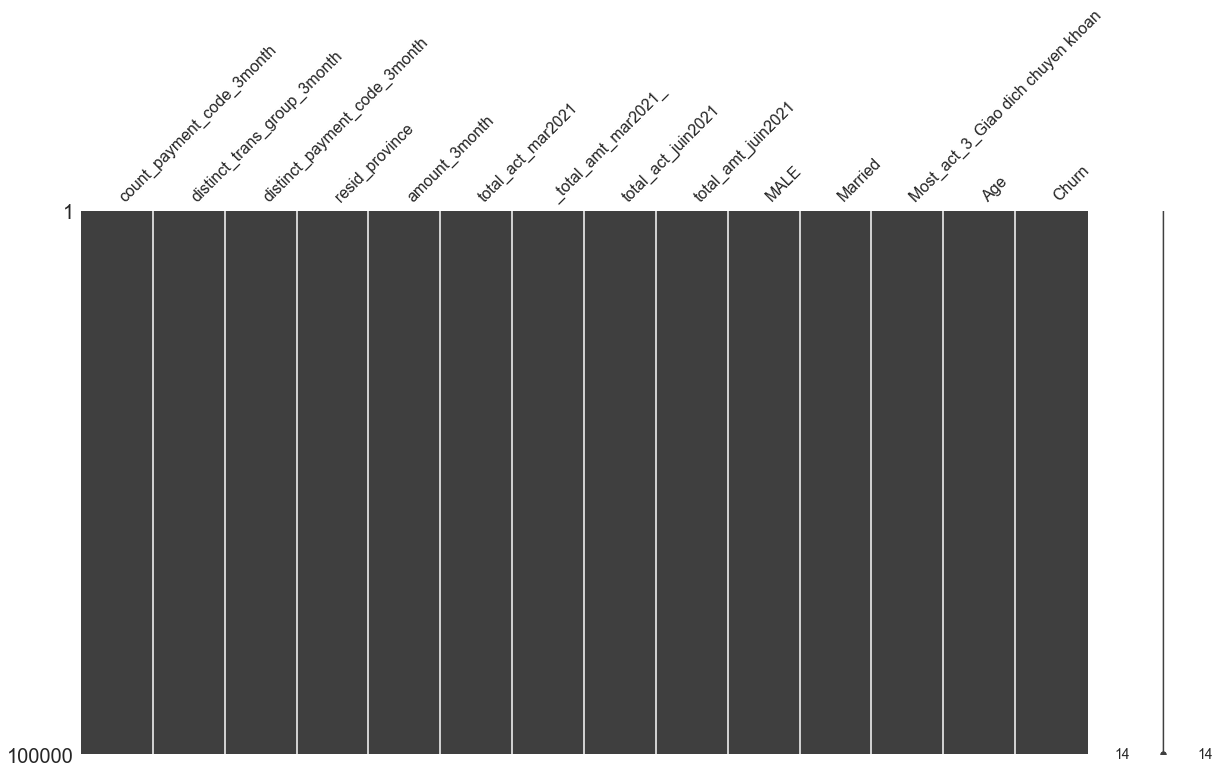

In [98]:
missingno.matrix(new_data, figsize = [20,10])

In [99]:
# Drop total_act_juin2021, total_amt_juin2021 because they are selected for independent variable 
new_data.drop(columns=['total_act_juin2021', 'total_amt_juin2021'], inplace=True)

In [100]:
corr = new_data.corr()
corr

,count_payment_code_3month,distinct_trans_group_3month,distinct_payment_code_3month,resid_province,amount_3month,total_act_mar2021,_total_amt_mar2021_,MALE,Married,Most_act_3_Giao dich chuyen khoan,Age,Churn
count_payment_code_3month,1.000000,0.293827,0.446057,0.086280,0.049575,0.187854,0.024932,0.002795,0.063214,0.115364,0.026097,-0.062375
distinct_trans_group_3month,0.293827,1.000000,0.561512,0.112343,0.095756,0.269170,0.074215,-0.065111,0.126034,0.417014,0.012722,-0.092817
distinct_payment_code_3month,0.446057,0.561512,1.000000,0.087789,0.075921,0.200820,0.054060,-0.018370,0.151646,0.241912,0.115271,-0.074713
resid_province,0.086280,0.112343,0.087789,1.000000,0.025106,0.033680,0.012545,-0.005910,0.056812,0.069442,0.041066,0.047944
amount_3month,0.049575,0.095756,0.075921,0.025106,1.000000,0.174301,0.519872,-0.026315,0.043506,0.079237,0.045714,-0.033553
total_act_mar2021,0.187854,0.269170,0.200820,0.033680,0.174301,1.000000,0.286815,-0.041768,0.043698,0.291791,-0.006651,-0.119231
_total_amt_mar2021_,0.024932,0.074215,0.054060,0.012545,0.519872,0.286815,1.000000,-0.021035,0.045787,0.098603,0.047700,-0.045501
MALE,0.002795,-0.065111,-0.018370,-0.005910,-0.026315,-0.041768,-0.021035,1.000000,-0.034314,-0.049931,0.065603,0.030558
Married,0.063214,0.126034,0.151646,0.056812,0.043506,0.043698,0.045787,-0.034314,1.000000,0.123995,0.464672,0.053027
Most_act_3_Giao dich chuyen khoan,0.115364,0.417014,0.241912,0.069442,0.079237,0.291791,0.098603,-0.049931,0.123995,1.000000,0.065398,-0.026571


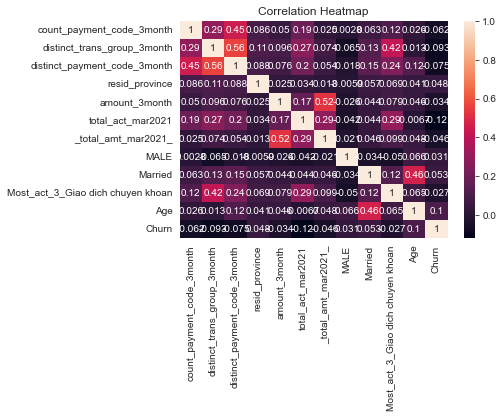

In [101]:
sns.heatmap(corr, annot = True)
plt.title('Correlation Heatmap')
plt.show()

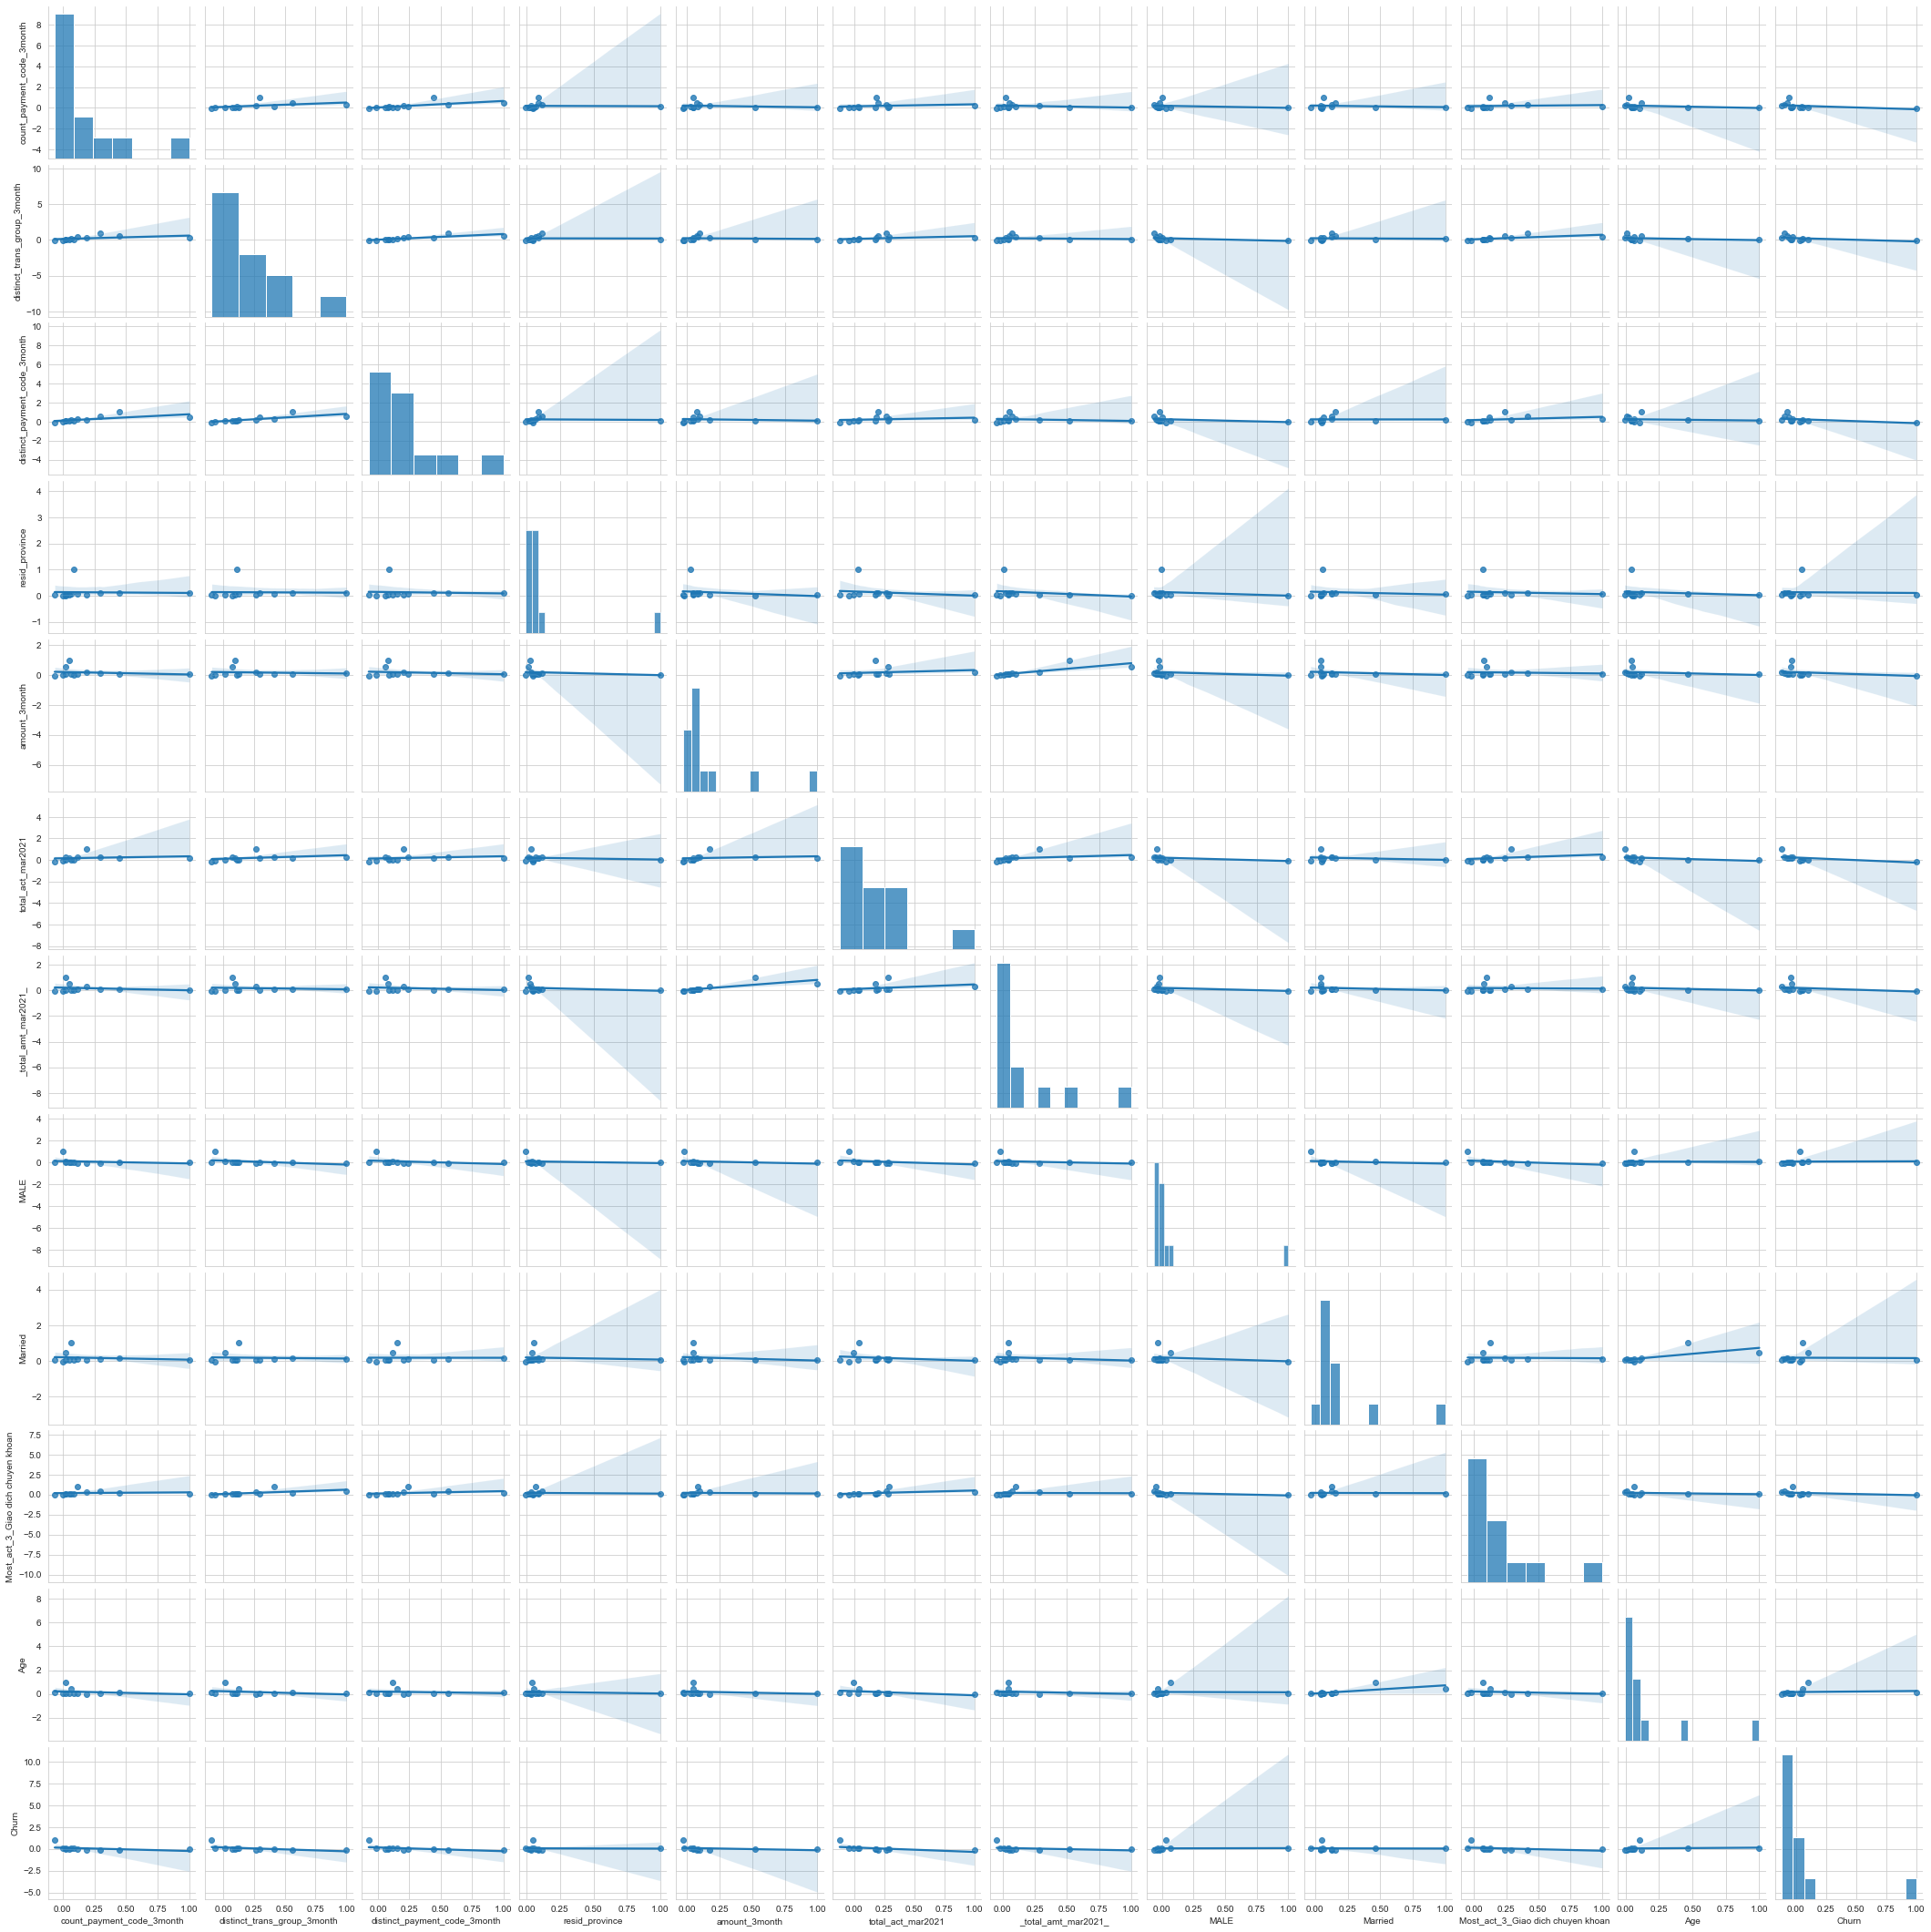

In [102]:
sns.pairplot(corr, kind = 'reg')
plt.show()

In [103]:
new_data.head(50)

,count_payment_code_3month,distinct_trans_group_3month,distinct_payment_code_3month,resid_province,amount_3month,total_act_mar2021,_total_amt_mar2021_,MALE,Married,Most_act_3_Giao dich chuyen khoan,Age,Churn
0,0,2,0,27.0,7.350000e-05,5.0,1.612700e-05,1,1,1,29.0,0
1,0,2,0,79.0,1.380000e-05,0.0,0.000000e+00,1,0,0,35.0,1
2,3,2,2,1.0,1.570000e-05,6.0,4.579200e-05,1,1,1,41.0,1
3,0,1,0,40.0,1.310000e-07,0.0,0.000000e+00,1,0,0,20.0,0
4,11,3,1,49.0,7.450000e-05,10.0,1.698740e-04,1,1,1,32.0,0
5,5,1,1,37.0,1.310000e-07,2.0,2.145000e-06,1,0,0,28.0,0
6,0,1,0,1.0,1.310000e-07,0.0,0.000000e+00,1,0,0,27.0,0
7,2,3,1,38.0,3.435940e-04,71.0,1.015194e-03,1,1,1,29.0,0
8,3,2,1,40.0,5.000000e-07,0.0,0.000000e+00,1,1,0,32.0,0
9,0,1,0,1.0,1.310000e-07,0.0,0.000000e+00,0,0,0,21.0,0


# Split train/test dataset

In [104]:
X = new_data.drop('Churn',axis=1)
y = new_data['Churn']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 103)

# Model development

## Train Logistic Regression model

In [106]:
clf = LogisticRegression(random_state=103)
clf.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=103)

### Predict on Test set

In [107]:
y_pred = clf.predict(X_test)

### Evaluation metrics

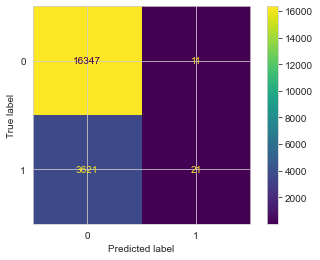

Confusion Matrix


In [108]:
plot_confusion_matrix(clf, X_test, y_test, values_format = 'd')
plt.show()  
print('Confusion Matrix')

In [109]:
print('Accuracy_score of Logistic Regression classifier: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('Precision_score of Logistic Regression classifier: {:.3f}'.format(precision_score(y_test, y_pred)))
print('Recall_score of Logistic Regression classifier: {:.3f}'.format(recall_score(y_test, y_pred)))

Accuracy_score of Logistic Regression classifier: 0.818
Precision_score of Logistic Regression classifier: 0.656
Recall_score of Logistic Regression classifier: 0.006


## Train Decision Tree model

In [110]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=20)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20)

In [111]:
y_pred_1 = tree.predict(X_test)

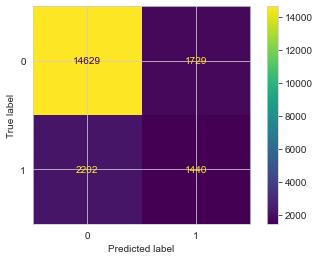

Confusion Matrix 1


In [112]:
plot_confusion_matrix(tree, X_test, y_test, values_format = 'd')
plt.show()  
print('Confusion Matrix 1')

In [113]:
print('Accuracy_score of Decision Tree classifier: {:.3f}'.format(accuracy_score(y_test, y_pred_1)))
print('Precision_score of Decision Tree classifier: {:.3f}'.format(precision_score(y_test, y_pred_1)))
print('Recall_score of Decision Tree classifier: {:.3f}'.format(recall_score(y_test, y_pred_1)))

Accuracy_score of Decision Tree classifier: 0.803
Precision_score of Decision Tree classifier: 0.454
Recall_score of Decision Tree classifier: 0.395


## Train Random Forest model

In [114]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [115]:
y_pred_5 = forest.predict(X_test)

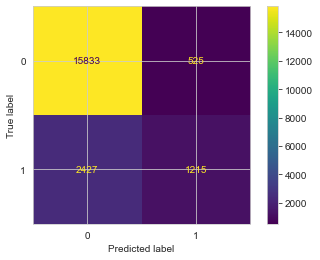

Confusion Matrix 5


In [116]:
plot_confusion_matrix(forest, X_test, y_test, values_format = 'd')
plt.show()  
print('Confusion Matrix 5')

In [117]:
print('Accuracy_score of Random Forest classifier: {:.3f}'.format(accuracy_score(y_test, y_pred_5)))
print('Precision_score of Random Forest classifier: {:.3f}'.format(precision_score(y_test, y_pred_5)))
print('Recall_score of Random Forest classifier: {:.3f}'.format(recall_score(y_test, y_pred_5)))

Accuracy_score of Random Forest classifier: 0.852
Precision_score of Random Forest classifier: 0.698
Recall_score of Random Forest classifier: 0.334


## Train Naive Bayes model

In [118]:
from sklearn.naive_bayes import GaussianNB 
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [119]:
y_pred_4 = nb.predict(X_test)

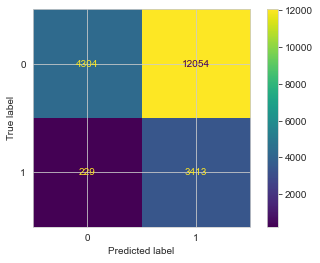

Confusion Matrix 4


In [120]:
plot_confusion_matrix(nb, X_test, y_test, values_format = 'd')
plt.show()  
print('Confusion Matrix 4')

In [121]:
print('Accuracy_score of Naive Bayes classifier: {:.3f}'.format(accuracy_score(y_test, y_pred_4)))
print('Precision_score of Naive Bayes classifier: {:.3f}'.format(precision_score(y_test, y_pred_4)))
print('Recall_score of Naive Bayes classifier: {:.3f}'.format(recall_score(y_test, y_pred_4)))

Accuracy_score of Naive Bayes classifier: 0.386
Precision_score of Naive Bayes classifier: 0.221
Recall_score of Naive Bayes classifier: 0.937


## Train K nearest neighbors model

In [122]:
from sklearn.neighbors import KNeighborsClassifier
KN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2, algorithm = 'brute')
KN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute')

In [123]:
y_pred_2 = KN.predict(X_test)

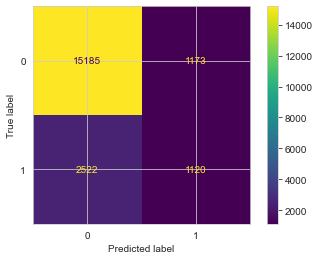

Confusion Matrix 2


In [124]:
plot_confusion_matrix(KN, X_test, y_test, values_format = 'd')
plt.show()  
print('Confusion Matrix 2')

In [125]:
print('Accuracy_score of K nearest neighbors classifier: {:.3f}'.format(accuracy_score(y_test, y_pred_2)))
print('Precision_score of K nearest neighbors classifier: {:.3f}'.format(precision_score(y_test, y_pred_2)))
print('Recall_score of K nearest neighbors classifier: {:.3f}'.format(recall_score(y_test, y_pred_2)))

Accuracy_score of K nearest neighbors classifier: 0.815
Precision_score of K nearest neighbors classifier: 0.488
Recall_score of K nearest neighbors classifier: 0.308
